# **Problem Statement**
Understanding customer behavior is crucial for targeted marketing and business growth. This project applies K-Means clustering to segment customers based on their annual income and spending scores. By identifying distinct customer groups, businesses can personalize marketing strategies and enhance customer engagement.

# **Industry Applications of Customer Segmentation (Unsupervised Learning)  K-Means Clustering**

### **1. Targeted Marketing & Personalized Promotions**
- Businesses can use segmentation to identify **high-value customers** and offer them **exclusive discounts, loyalty rewards, or personalized product recommendations**.  
- Budget-conscious customers can receive **affordable pricing options, seasonal sales notifications, and promotional bundles**, improving conversion rates.  

### **2. Optimized Store Layout & Inventory Management**
- Malls and retail stores can **arrange product placement** based on segmented customer preferences, ensuring high-demand items are easily accessible.  
- Inventory can be managed efficiently by predicting **which customer segments are more likely to purchase specific products**, reducing overstock or shortages.  

### **3. Customer Experience Enhancement & Retention**
- High-spending customers can be offered **VIP experiences, early access to sales, and exclusive events**, increasing engagement and long-term loyalty.  
- Identifying low-engagement customers helps businesses **re-engage them through targeted communication and retention strategies**, improving overall profitability.  

# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Customer = pd.read_csv("/content/Mall_Customers.csv") #Dataloading

In [3]:
Customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Customer.shape

(200, 5)

In [5]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
Customer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
Customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
Customer.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## **Data Analysis**

Distribution of Annual Income

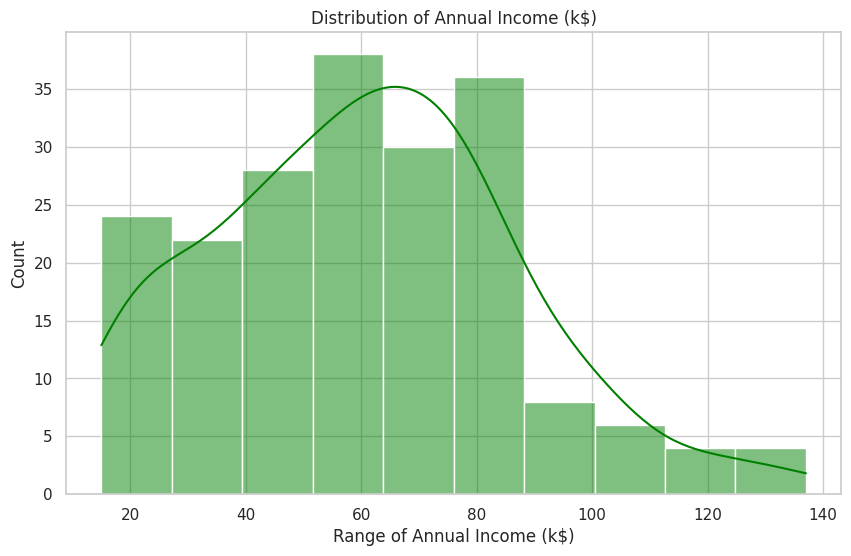

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(Customer['Annual Income (k$)'], color='green', kde=True)
plt.title("Distribution of Annual Income (k$)")
plt.xlabel("Range of Annual Income (k$)")
plt.ylabel("Count")
plt.show()

# **Distribution of Annual Income**

- The distribution of annual income is **right-skewed**, meaning fewer customers have extremely high incomes.

- Most customers earn between **40k$ -and- 80k$**, with a peak around **60k$,indicats-a-middle-income customer base.

- A small number of customers earn **above 100k$**, suggesting a high-income segment that may require a different marketing approach.

- The presence of a few lower-income customers (below 30k$) suggests affordability-based segmentation for budget-friendly offerings.
- The **smooth KDE curve** suggests a gradual increase and then a decline in the number of customers across income levels.


Distribution of Age

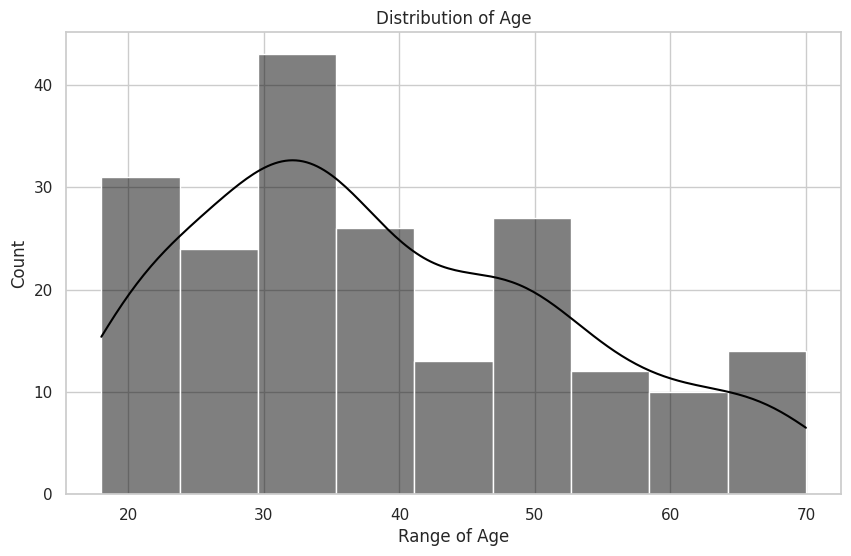

In [10]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(Customer['Age'], color='black', kde=True)
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel('Count')
plt.show()

# **Distribution of Age**

- The majority of customers fall between **25 to 40 years old**, with the peak around **30 years**, suggesting a younger customer base.

- There is a gradual decline in customer count as age increases, indicating fewer older customers participating in transactions.

- A secondary peak around **50 years** suggests that a subset of middle-aged customers is actively engaged in purchases.

- Very few customers are aged **above 60**, indicating that businesses targeting senior citizens might need a different approach.

- The distribution suggests that **age could be an influencing factor** in spending behavior and marketing strategies.


Distrubution of Spending Score

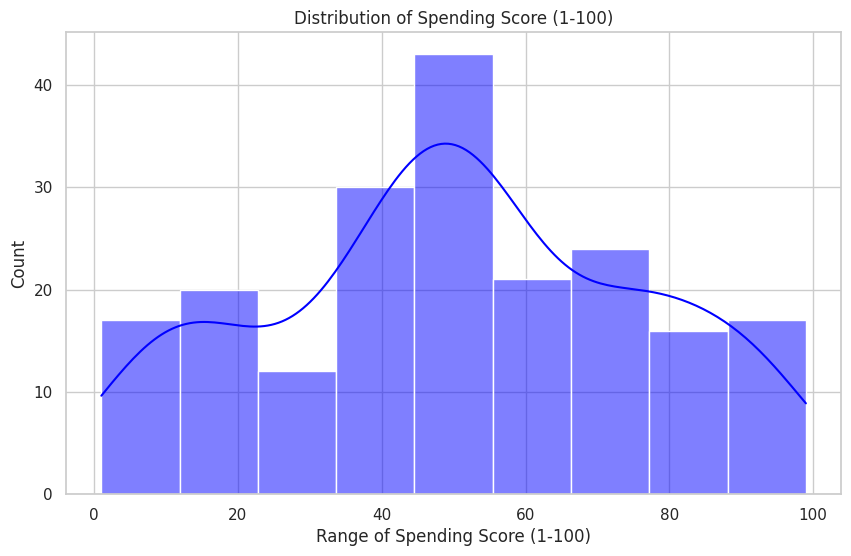

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(Customer['Spending Score (1-100)'], color='blue', kde=True)
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel('Count')
plt.show()

# **Distribution of Spending Score**

- The spending scores range from **0 to 100**, with most customers scoring between **40 and 60**, indicating a mix of moderate spenders.

- There is a secondary high concentration of customers scoring **above 80**, which suggests the presence of high-value customers.

- The distribution is slightly **bimodal**, meaning there are two dominant spending groups—moderate spenders and high spenders.

- Customers with **low spending scores (0-20)** might represent price-sensitive individuals or infrequent shoppers.

- This variation in spending behavior suggests that targeted promotions and loyalty programs could influence customer engagement.

Gender Distribution

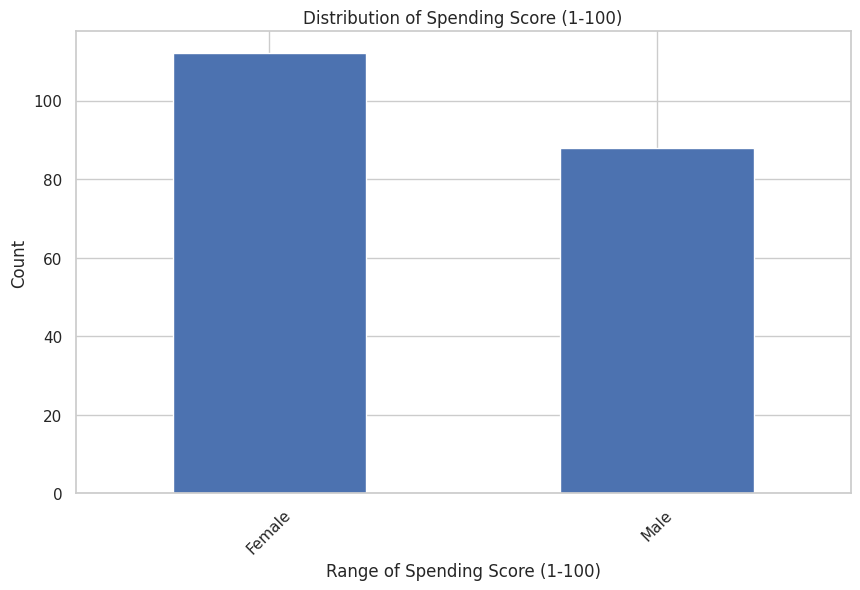

In [12]:
plt.figure(figsize=(10, 6))
Customer.Gender.value_counts().plot(kind='bar')
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
df = Customer[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
X.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


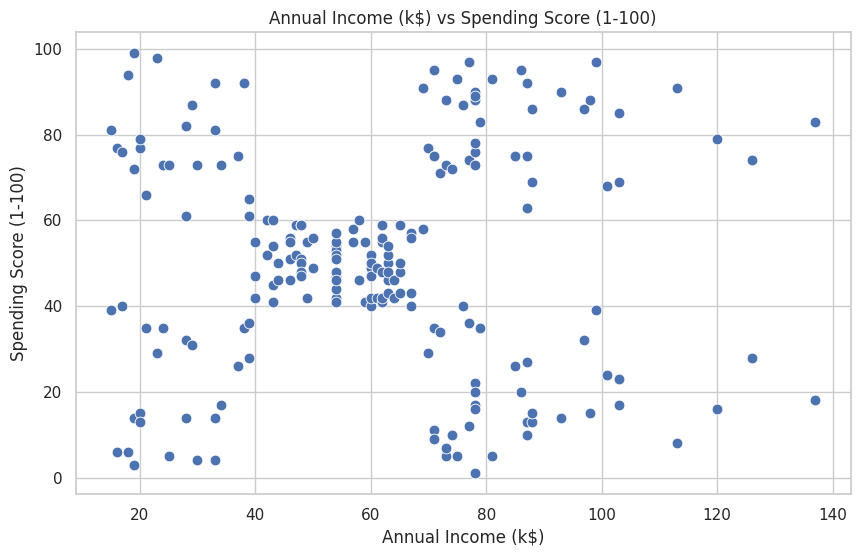

In [16]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data= X, s = 60)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []  # Initialize an empty list to store Within-Cluster Sum of Squares (WCSS)

for i in range(1, 11):  # Iterate over different values of k (number of clusters)
    km = KMeans(n_clusters=i)  # Create a K-Means model with i clusters
    km.fit(X)  # Fit K-Means on dataset X
    wcss.append(km.inertia_)  # Store WCSS (inertia) for the given number of clusters

# **Finding the Optimal Number of Clusters (K) using the Elbow Method**

## What is WCSS?
**WCSS (Within-Cluster Sum of Squares)** measures how tightly grouped the points are within each cluster.  
- Lower WCSS means the clusters are **compact** and **well-separated**.

## **Purpose of This Code (Elbow Method)**  
- Runs **K-Means** for different values of \( K \) (from **1 to 10 clusters**).  
- Calculates and stores **WCSS** for each \( K \).  
- The **Elbow Method** helps find the best \( K \) where adding more clusters **doesn’t significantly reduce WCSS**.

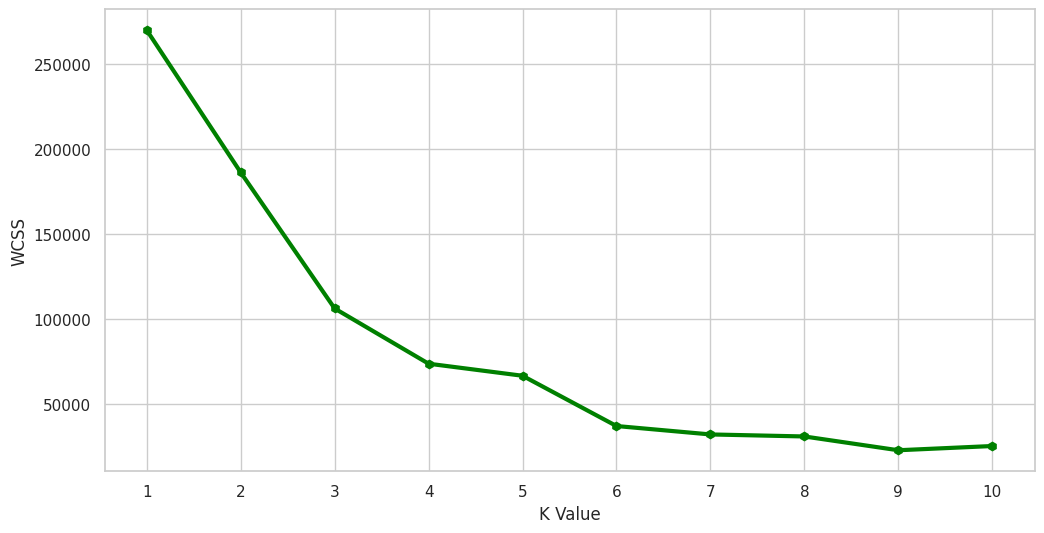

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 3, color="green", marker = "h")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.show()

# **Elbow Method (WCSS vs K for 2D Clustering)**

- The **elbow point appears at K=5**, meaning five clusters provide an optimal segmentation of customers.

- As the number of clusters increases beyond **5**, the reduction in WCSS becomes minimal, indicating diminishing returns.

- Using **too few clusters** (e.g., K=2 or K=3) would result in broad groupings that fail to capture key customer differences.

- Using **too many clusters** (e.g., K=8 or K=9) would lead to over-segmentation, making analysis complex without much added value.

- This analysis suggests that a **five-group segmentation** strategy is the most efficient for business decision-making.


In [20]:
km1 = KMeans(n_clusters=5)  # Step 1: Initialize K-Means with 5 clusters
km1.fit(X)  # Step 2: Fit the model on the dataset X
y = km1.predict(X)  # Step 3: Predict cluster labels for all points in X
df["label"] = y  # Step 4: Store cluster labels in df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


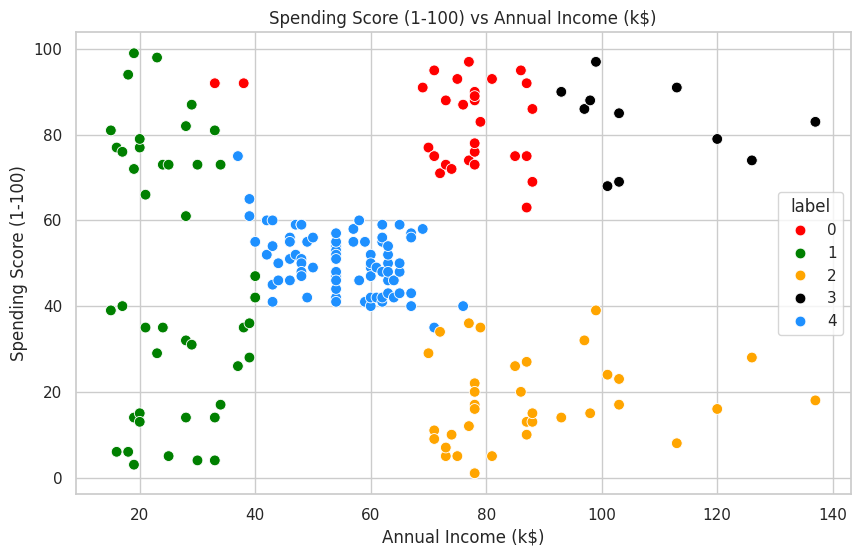

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "label",
               palette=['red', 'green', 'orange', 'black', 'dodgerblue'], legend = 'full', data = df, s = 60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score (1-100) vs Annual Income (k$)")
plt.show()

# **2D Customer Segmentation (Annual Income vs Spending Score)**

- The scatter plot reveals five well-defined clusters, separating customers based on income and spending patterns.

- **Low-income, low-spending customers (green cluster)** represent price-sensitive customers who may require discounts or promotions.

- **Low-income, high-spending customers (red cluster)** indicate impulsive buyers or those highly engaged with certain products.

- **High-income, high-spending customers (black cluster)** are premium buyers who may respond well to luxury and exclusive offers.

- **High-income, low-spending customers (orange cluster)** suggest untapped potential where marketing efforts can increase spending.


In [22]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 44
They are - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 35 36 37 38 39 41 43 45 48 49 50]
--------------------------------------------
Number of customer in 2nd group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 3rd group= 30
They are - [ 34  42 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154
 156 158 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 4th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------
Number of customer in 5th group= 79
They are - [ 40  44  46  47  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 

### **1st Group (44 Customers)**
- This segment represents **the largest group of customers**, consisting mostly of customers with **moderate income and balanced spending scores**.
- They are likely **mid-level shoppers** who make frequent purchases but do not fall into extreme high or low spending categories.

---

### **2nd Group (36 Customers)**
- This group consists of customers **with high income but lower spending scores**, indicating potential for increased engagement.
- Businesses can target this group with **exclusive deals, loyalty programs, or premium services** to encourage higher spending.

---

### **3rd Group (30 Customers)**
- These customers have a **low-to-moderate income** and are **cautious spenders**, possibly budget-conscious individuals.
- Offering **discounts, cashback offers, and installment plans** could make them more engaged with the business.

---

### **4th Group (11 Customers)**
- This is the **smallest segment**, consisting of **low-income and low-spending** customers.
- Since this group has minimal engagement, they might need **aggressive marketing strategies** or personalized promotions to increase their spending.

---

### **5th Group (79 Customers)**
- The **largest cluster**, these customers have **high spending scores and a diverse range of incomes**.
- They represent the **most valuable segment**, making them ideal targets for **premium services, VIP programs, and retention strategies**.
- Personalized recommendations, seasonal offers, and customer engagement programs can **maximize revenue from this segment**.

In [23]:
Customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Clustering on the basis of 3D Data

In [24]:
df2 = Customer[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
X2 = df2[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [26]:
X2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [27]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(X2)
    wcss.append(km.inertia_)

In [28]:
wcss

[308812.7800000001,
 221087.1962719298,
 143342.75157170597,
 104374.1598511286,
 79261.17713321766,
 68421.69719382068,
 51118.949931647316,
 48946.146209346196,
 42294.08839362723,
 37508.949909380695]

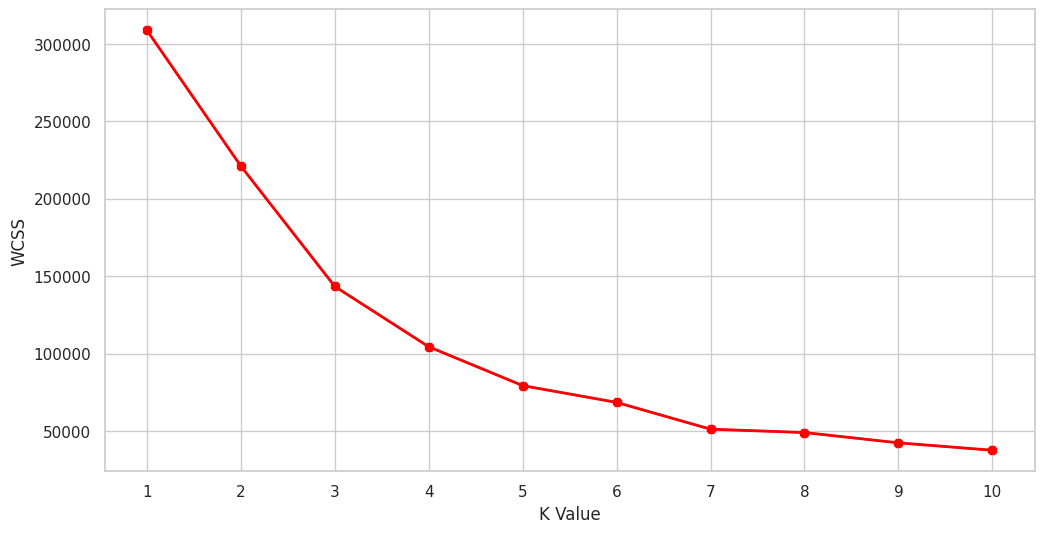

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 2, color="red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.show()

# **Elbow Method (WCSS vs K for 3D Clustering)**

- The **optimal number of clusters remains at K=5**, even when age is introduced as an additional dimension.
- The WCSS graph shows a sharp decline up to **K=5**, confirming the elbow point.
- Beyond **K=5**, the decrease in WCSS is marginal, meaning additional clusters would not significantly improve segmentation.
- The similarity in the elbow points for both 2D and 3D clustering suggests that spending behavior is **strongly influenced by income and age together**.
- This confirms that **age is a relevant factor in customer segmentation**, strengthening the case for 3D clustering.


In [30]:
km2  = KMeans(n_clusters=5)
km2.fit(X2)
y2=km2.predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [31]:
from mpl_toolkits.mplot3d import Axes3D

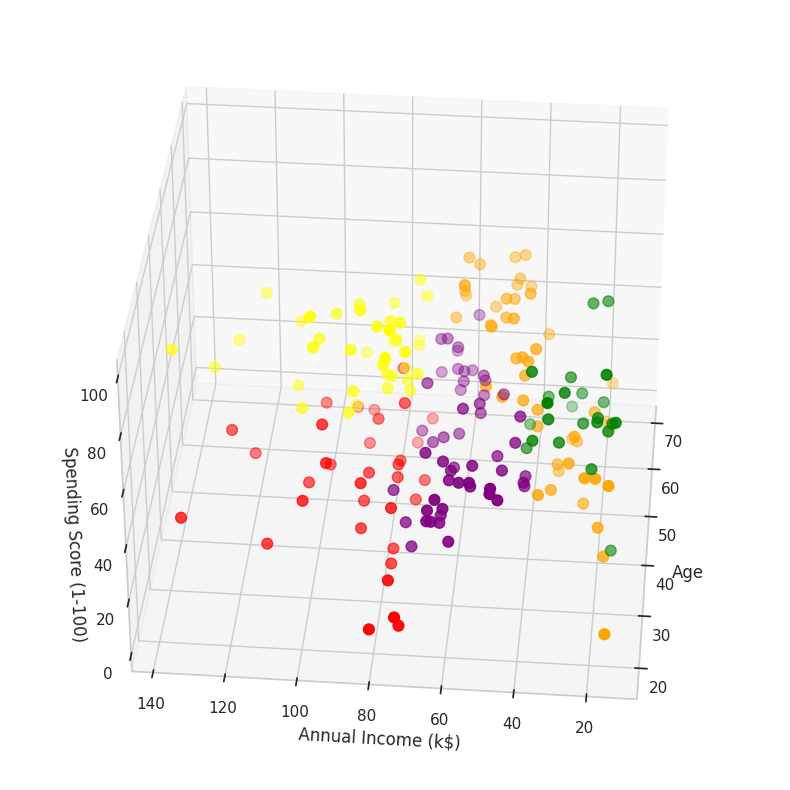

In [32]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2.Age[df2.label == 0], df2['Annual Income (k$)'][df2.label==0], df2['Spending Score (1-100)'][df2.label==0], c = 'purple', s = 60)
ax.scatter(df2.Age[df2.label == 1], df2['Annual Income (k$)'][df2.label==1], df2['Spending Score (1-100)'][df2.label==1], c = 'red', s = 60)
ax.scatter(df2.Age[df2.label == 2], df2['Annual Income (k$)'][df2.label==2], df2['Spending Score (1-100)'][df2.label==2], c = 'orange', s = 60)
ax.scatter(df2.Age[df2.label == 3], df2['Annual Income (k$)'][df2.label==3], df2['Spending Score (1-100)'][df2.label==3], c = 'green', s = 60)
ax.scatter(df2.Age[df2.label == 4], df2['Annual Income (k$)'][df2.label==4], df2['Spending Score (1-100)'][df2.label==4], c = 'yellow', s = 60)

ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# **3D Customer Segmentation (Age, Income, Spending Score)**

- The scatter plot reveals five well-defined clusters, separating customers based on income and spending patterns.

- **Low-income, low-spending customers (green cluster)** represent price-sensitive customers who may require discounts or promotions.

- **Low-income, high-spending customers (red cluster)** indicate impulsive buyers or those highly engaged with certain products.

- **High-income, high-spending customers (black cluster)** are premium buyers who may respond well to luxury and exclusive offers.

- **High-income, low-spending customers (orange cluster)** suggest untapped potential where marketing efforts can increase spending.


In [33]:
cust1=df2[df2["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 53
They are - [ 48  49  50  52  53  59  62  66  67  69  70  76  77  78  79  82  84  85
  86  87  88  89  90  92  93  94  95  96  97  98  99 100 101 102 104 105
 106 108 112 113 114 115 116 118 119 120 121 122 123 125 127 133 143]
--------------------------------------------
Number of customer in 2nd group= 34
They are - [129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165 167
 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 3rd group= 50
They are - [  3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37
  39  41  43  45  47  51  54  55  56  57  58  60  61  63  64  65  68  71
  72  73  74  75  80  81  83  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 4th group= 24
They are - [ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]
--------------------------------------------

### **1st Group (53 Customers)**
- This group consists of **moderate-to-high spenders** with a balanced range of incomes.
- They represent **regular shoppers** who engage frequently with the business, making them ideal for **loyalty programs and seasonal promotions**.

---

### **2nd Group (34 Customers)**
- Customers in this segment have **high incomes but relatively lower spending scores**, indicating **untapped potential**.
- Businesses can **target this group with premium product recommendations, exclusive discounts, or membership perks** to boost spending.

---

### **3rd Group (50 Customers)**
- This segment comprises **low-to-moderate income customers with moderate spending habits**.
- They are likely to be **budget-conscious buyers**, making them a good target for **affordable pricing strategies, installment plans, and discount offers**.

---

### **4th Group (24 Customers)**
- These are **low-income, low-spending customers**, forming one of the least engaged segments.
- Businesses may need to **re-engage this group with strong promotional campaigns, personalized incentives, or bundling strategies**.

---

### **5th Group (39 Customers)**
- This segment consists of **high-income, high-spending customers**, making them the most valuable.
- They are ideal targets for **luxury services, exclusive deals, and VIP engagement strategies to enhance retention and maximize lifetime value**.

# **Final Conclusion**

The customer segmentation analysis successfully identified **five distinct groups** based on **income, spending behavior, and age**. Each group exhibits unique characteristics, allowing businesses to design **targeted marketing strategies** that improve engagement and sales.

## **Reasons for Conclusion**

### **1. Diverse Spending Behavior**
- Customers do not follow a uniform spending pattern; some **spend cautiously**, while others make **frequent or high-value purchases**.
- Understanding this difference allows businesses to offer **personalized promotions** instead of using a one-size-fits-all approach.

### **2. High-Income, Low-Spending Customers Present an Opportunity**
- A group of customers has **high incomes but spends less**, indicating **untapped revenue potential**.
- Businesses can **encourage higher spending** by offering **exclusive services, premium recommendations, and membership benefits**.

### **3. Loyal and High-Spending Customers Must Be Retained**
- A segment of **high-income and high-spending customers** represents the most valuable group.
- Retaining these customers requires **VIP programs, priority services, and loyalty incentives** to ensure long-term engagement.

### **4. Budget-Conscious Shoppers Need Incentives**
- A portion of customers falls into the **low-income, low-spending** category, making them price-sensitive.
- Attracting them requires **discounted bundles, cashback offers, and installment plans** to increase affordability.

### **5. Younger Customers Show Higher Engagement**
- The analysis shows that **younger customers (20-35 years)** tend to **spend more**, especially those with moderate-to-high incomes.
- Businesses can **focus marketing efforts on digital platforms, social media, and targeted promotions** to appeal to this segment.

## **Final Business Strategy Recommendation**
- **Use data-driven marketing**: Implement segmentation-based offers rather than generalized promotions.
- **Maximize high-value customer retention**: Offer premium experiences and exclusive perks to keep top spenders engaged.
- **Increase spending from cautious buyers**: Use strategic incentives such as discounts and personalized deals.
- **Optimize campaigns for younger, high-engagement customers**: Invest in digital strategies targeting the 20-35 age group.

# **End**